In [112]:
%pylab inline
from parse_logs import build_df
import matplotlib.pyplot as plt
import numpy as np
import dateutil


def print_groupby(groupby):
    for name, group in groupby:
        print('name: ' + str(name))
        print('group: ' + str(group))
        print('\n')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [48]:
df = build_df('../../mongochain-logs/100n-f0-5c-80puts.log')
df['timestamp'] = [dateutil.parser.parse(x) for x in df['timestamp']]

In [49]:
start_df = df[df.event_type == 'CLIENT_NEW_TRANSACTION']

In [50]:
group_start = start_df.groupby(['content_hash'], as_index=False).agg({'timestamp': np.min})
group_start

,content_hash,timestamp
0,03d68e70f05c611e8ae8b13511eda7e875ace2fbf243fe...,2018-03-16 12:03:37.898
1,05f1c74140195515333cd7978c463c7b8c606400837e6e...,2018-03-16 12:02:51.055
2,0953e956ef57aeaa57abd1f416fff46face4b15cec87b5...,2018-03-16 12:03:52.585
3,0b0f090a3bf931aebe2713164ca4c3bd5ad645527b1223...,2018-03-16 12:04:48.282
4,0c61e12814c913c79d0d8d4c148143d1564ac0b79f69ac...,2018-03-16 12:03:05.597
5,0e5b3e7ed249f4868e7af91148720d013fb03dcc16044e...,2018-03-16 12:04:50.190
6,0fca905ab00b0a4a31326d341f5f1e493960ed4d7df365...,2018-03-16 12:05:19.839
7,11f3116f60dae3cb804faa8736dc38a34effc3f54d8c4f...,2018-03-16 12:04:59.275
8,199ed0cf5fed4a1c5a9bbaccb078ed296f293c77ffbcd6...,2018-03-16 12:03:42.631
9,1a19855a28881d306b633215019c5afbc1032603d18a21...,2018-03-16 12:05:20.897


In [51]:
end_df = df[df.event_type == 'CLIENT_INTEGRATE_GLOBAL_RESULT']
group_end = end_df.groupby(['content_hash'], as_index=False).agg({'timestamp': np.max})
group_end

,content_hash,timestamp
0,03d68e70f05c611e8ae8b13511eda7e875ace2fbf243fe...,2018-03-16 12:04:12.788
1,05f1c74140195515333cd7978c463c7b8c606400837e6e...,2018-03-16 12:03:19.667
2,0953e956ef57aeaa57abd1f416fff46face4b15cec87b5...,2018-03-16 12:04:23.394
3,0b0f090a3bf931aebe2713164ca4c3bd5ad645527b1223...,2018-03-16 12:04:48.862
4,0c61e12814c913c79d0d8d4c148143d1564ac0b79f69ac...,2018-03-16 12:03:42.167
5,0e5b3e7ed249f4868e7af91148720d013fb03dcc16044e...,2018-03-16 12:04:50.626
6,0fca905ab00b0a4a31326d341f5f1e493960ed4d7df365...,2018-03-16 12:05:20.309
7,11f3116f60dae3cb804faa8736dc38a34effc3f54d8c4f...,2018-03-16 12:04:59.856
8,199ed0cf5fed4a1c5a9bbaccb078ed296f293c77ffbcd6...,2018-03-16 12:04:12.788
9,1a19855a28881d306b633215019c5afbc1032603d18a21...,2018-03-16 12:05:21.175


In [86]:
joined = pd.merge(group_end, group_start, on='content_hash')
joined

,content_hash,timestamp_x,timestamp_y
0,03d68e70f05c611e8ae8b13511eda7e875ace2fbf243fe...,2018-03-16 12:04:12.788,2018-03-16 12:03:37.898
1,05f1c74140195515333cd7978c463c7b8c606400837e6e...,2018-03-16 12:03:19.667,2018-03-16 12:02:51.055
2,0953e956ef57aeaa57abd1f416fff46face4b15cec87b5...,2018-03-16 12:04:23.394,2018-03-16 12:03:52.585
3,0b0f090a3bf931aebe2713164ca4c3bd5ad645527b1223...,2018-03-16 12:04:48.862,2018-03-16 12:04:48.282
4,0c61e12814c913c79d0d8d4c148143d1564ac0b79f69ac...,2018-03-16 12:03:42.167,2018-03-16 12:03:05.597
5,0e5b3e7ed249f4868e7af91148720d013fb03dcc16044e...,2018-03-16 12:04:50.626,2018-03-16 12:04:50.190
6,0fca905ab00b0a4a31326d341f5f1e493960ed4d7df365...,2018-03-16 12:05:20.309,2018-03-16 12:05:19.839
7,11f3116f60dae3cb804faa8736dc38a34effc3f54d8c4f...,2018-03-16 12:04:59.856,2018-03-16 12:04:59.275
8,199ed0cf5fed4a1c5a9bbaccb078ed296f293c77ffbcd6...,2018-03-16 12:04:12.788,2018-03-16 12:03:42.631
9,1a19855a28881d306b633215019c5afbc1032603d18a21...,2018-03-16 12:05:21.175,2018-03-16 12:05:20.897


In [113]:
diff = (joined['timestamp_x'] - joined['timestamp_y']).apply(lambda x: x.total_seconds()).rename('duration')
diff

0     34.890
1     28.612
2     30.809
3      0.580
4     36.570
5      0.436
6      0.470
7      0.581
8     30.157
9      0.278
10    30.570
11     0.337
12    32.616
13     5.062
14    36.042
15     0.375
16    35.762
17    25.759
18     0.653
19     0.777
20    34.262
21    31.242
22    32.095
23    34.929
24    27.599
25     0.714
26     0.468
27    11.339
28     0.513
29     0.784
       ...  
53     0.546
54    28.805
55    32.554
56     0.744
57    37.942
58     0.338
59    35.947
60     0.242
61    36.846
62    29.822
63     0.315
64    34.934
65    31.263
66    32.421
67    37.382
68     0.742
69    36.157
70    33.260
71    37.345
72     0.427
73    35.690
74    33.937
75     0.908
76     0.291
77     0.355
78     0.681
79    36.018
80    30.958
81     1.201
82     0.182
Name: duration, dtype: float64

Mean : 17.563662650602414
Median : 25.759


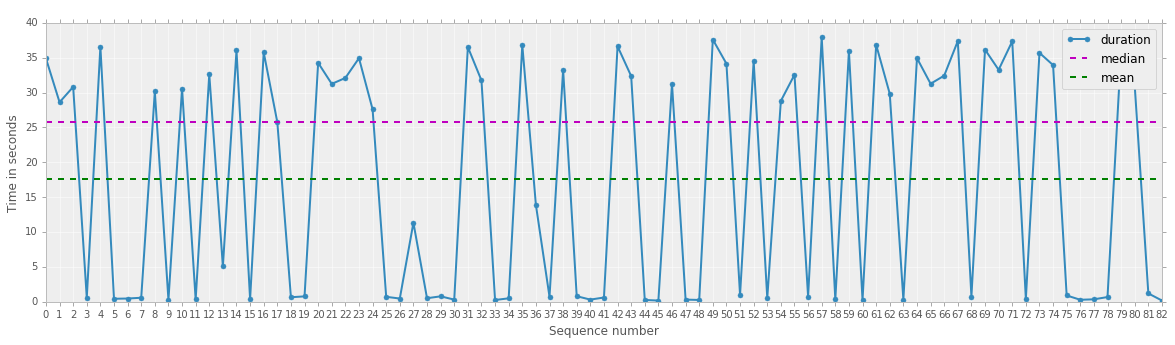

In [114]:
plt.style.use('bmh')
consensus_plot = diff.plot(lw=2, marker='.', markersize=10, title='Time per consensus', figsize=(20, 5))
mean = diff.mean()
median = diff.median()
print("Mean : {0}".format(mean))
print("Median : {0}".format(median))
consensus_plot.axhline(median, color='m', linestyle='dashed', label='median')
consensus_plot.axhline(mean, color='g', linestyle='dashed', label='mean')
consensus_plot.set_ylabel('Time in seconds')
consensus_plot.set_xlabel('Sequence number')
consensus_plot.set_xticks(range(diff.size))
l = consensus_plot.legend()
for t in l.get_texts():
    t.set_color('black')